In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [5]:
x = df.drop(columns = 'quality')
y = df['quality']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='count'>

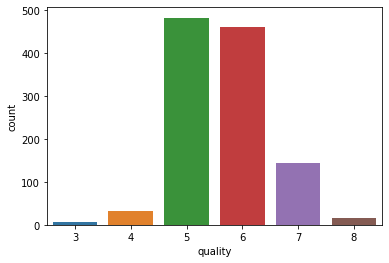

In [8]:
sns.countplot(x='quality',data=df)

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
smote = SMOTE()

In [11]:
x_smote,y_smote = smote.fit_resample(x,y)

In [12]:
from collections import Counter 

In [13]:
Counter(y_smote)

Counter({5: 483, 6: 483, 7: 483, 4: 483, 8: 483, 3: 483})

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.05,random_state = 123)

In [15]:
x_train.shape

(2753, 12)

In [16]:
x_test.shape

(145, 12)

In [17]:
y_test.shape

(145,)

In [18]:
y_train.shape

(2753,)

In [19]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [20]:
from lightgbm import LGBMClassifier

In [21]:
from xgboost import XGBClassifier

In [22]:
from catboost import CatBoostClassifier

**ADA Boost Classifer**

In [23]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [24]:
yadapred = ada.predict(x_test)

In [25]:
from sklearn.metrics import classification_report


In [26]:
cls1 = classification_report(y_test,yadapred)
print(cls1)

              precision    recall  f1-score   support

           3       0.40      1.00      0.57        23
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        25
           7       0.29      0.89      0.43        27
           8       0.50      0.08      0.13        26

    accuracy                           0.34       145
   macro avg       0.20      0.33      0.19       145
weighted avg       0.21      0.34      0.20       145



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Gradient Boosting Classifier**

In [27]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [28]:
ygbpred = gbc.predict(x_test)

In [29]:
cls1 = classification_report(y_test,ygbpred)
print(cls1)

              precision    recall  f1-score   support

           3       0.96      1.00      0.98        23
           4       0.90      0.83      0.86        23
           5       0.61      0.52      0.56        21
           6       0.46      0.44      0.45        25
           7       0.74      0.85      0.79        27
           8       0.93      0.96      0.94        26

    accuracy                           0.77       145
   macro avg       0.77      0.77      0.77       145
weighted avg       0.77      0.77      0.77       145



**Light Boosting Gradient**

In [30]:
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)

LGBMClassifier()

In [31]:
ylgbmpred = lgbm.predict(x_test)

In [32]:
cls1 = classification_report(y_test,ylgbmpred)
print(cls1)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        23
           4       0.95      0.83      0.88        23
           5       0.72      0.62      0.67        21
           6       0.67      0.72      0.69        25
           7       0.84      0.96      0.90        27
           8       1.00      1.00      1.00        26

    accuracy                           0.86       145
   macro avg       0.86      0.85      0.86       145
weighted avg       0.86      0.86      0.86       145



**Cat Boost Classifier**

In [33]:
cat = CatBoostClassifier(iterations = 100)
cat.fit(x_train,y_train)

Learning rate set to 0.5
0:	learn: 1.3290632	total: 74.1ms	remaining: 7.34s
1:	learn: 1.1412493	total: 86.1ms	remaining: 4.22s
2:	learn: 1.0089702	total: 97.9ms	remaining: 3.17s
3:	learn: 0.9208731	total: 108ms	remaining: 2.6s
4:	learn: 0.8403422	total: 118ms	remaining: 2.24s
5:	learn: 0.7828277	total: 127ms	remaining: 1.99s
6:	learn: 0.7352171	total: 137ms	remaining: 1.82s
7:	learn: 0.6976839	total: 146ms	remaining: 1.68s
8:	learn: 0.6640536	total: 156ms	remaining: 1.57s
9:	learn: 0.6355504	total: 168ms	remaining: 1.51s
10:	learn: 0.6098463	total: 177ms	remaining: 1.44s
11:	learn: 0.5901677	total: 187ms	remaining: 1.37s
12:	learn: 0.5630031	total: 198ms	remaining: 1.33s
13:	learn: 0.5464810	total: 209ms	remaining: 1.28s
14:	learn: 0.5291924	total: 219ms	remaining: 1.24s
15:	learn: 0.5121030	total: 231ms	remaining: 1.22s
16:	learn: 0.4972808	total: 241ms	remaining: 1.18s
17:	learn: 0.4823631	total: 250ms	remaining: 1.14s
18:	learn: 0.4701649	total: 260ms	remaining: 1.11s
19:	learn: 0.4

In [34]:
ycatpred = cat.predict(x_test)

In [35]:
cls1 = classification_report(y_test,ycatpred)
print(cls1)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        23
           4       0.95      0.78      0.86        23
           5       0.78      0.67      0.72        21
           6       0.64      0.64      0.64        25
           7       0.76      0.93      0.83        27
           8       0.93      0.96      0.94        26

    accuracy                           0.83       145
   macro avg       0.84      0.83      0.83       145
weighted avg       0.84      0.83      0.83       145



**Extreme Gradient Boosting**

In [36]:
xgb = XGBClassifier()

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [39]:
pd.Series(y_train).unique()

array([3, 1, 4, 0, 5, 2])

In [40]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [41]:
yxgbpred = xgb.predict(x_test)

In [42]:
cls1 = classification_report(y_test,yxgbpred)
print(cls1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.83      0.88        23
           2       0.76      0.62      0.68        21
           3       0.68      0.68      0.68        25
           4       0.87      1.00      0.93        27
           5       0.90      1.00      0.95        26

    accuracy                           0.86       145
   macro avg       0.86      0.85      0.85       145
weighted avg       0.86      0.86      0.86       145

